# 100 Men vs 1 Gorilla

## Simple Gorilla vs Human round

In [1]:
from simulation_utils import * 
run_single_round_simulation(print_statement=True)

Human vs Gorilla, round 0
Human has resistance =  1.1529557218529203, he gets hit by strength = 11.171794334423018
Human has now resistance 0.9107132375433585
Human vs Gorilla, round 1
Human has resistance =  0.9107132375433585, he gets hit by strength = 11.171794334423018
Human has now resistance 0.6040361773592209
Human vs Gorilla, round 2
Human has resistance =  0.6040361773592209, he gets hit by strength = 11.171794334423018
Human has now resistance 0.14165516637139963
Human vs Gorilla, round 3
Human has resistance =  0.14165516637139963, he gets hit by strength = 11.171794334423018
Human has now resistance -1.8299980074232234
Human is dead after 4 rounds


(4, 1.1529557218529203, 11.171794334423018)

## Multiple rounds of Gorilla vs Human

In [7]:
import pandas as pd
import seaborn as sns

N = 10_000
round_simulations, human_resistances, gorilla_strengths = run_multiple_round_simulations(print_statement=False, num_simulations=N)
simulation_data = []
for i in range(N):
    simulation_data.append([round_simulations[i], human_resistances[i], gorilla_strengths[i]])
simulation_data = pd.DataFrame(simulation_data)
simulation_data.columns = ['Number Of Rounds', 'Human Resistance', 'Gorilla Strength']

Plotting:

/Users/pieropaialunga/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pieropaialunga/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pieropaialunga/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


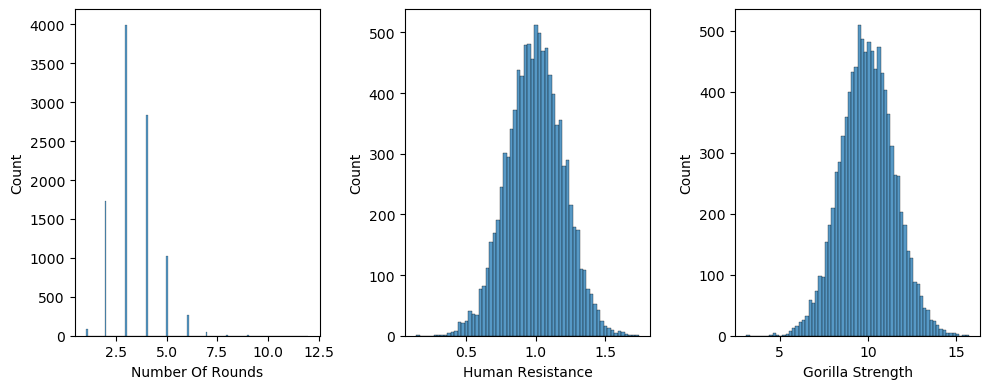

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.histplot(simulation_data['Number Of Rounds'].astype('int'))
plt.subplot(1,3,2)
sns.histplot(simulation_data['Human Resistance'])
plt.subplot(1,3,3)
sns.histplot(simulation_data['Gorilla Strength'])
plt.tight_layout()

In [5]:
from human_population import HumanPopulation
population = HumanPopulation(batch_number=5, strategy='strength_first')
batch_population_zero = population.batches[0]

NameError: name 'batch_population_zero' is not defined

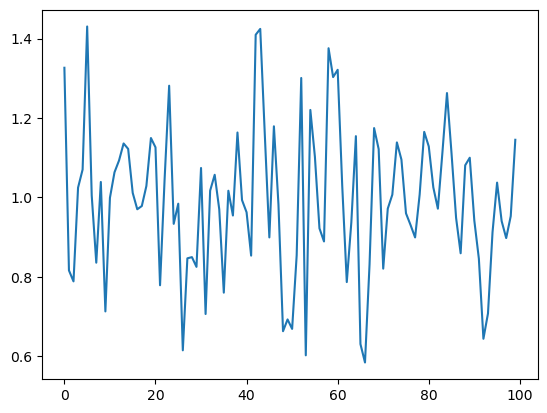

In [6]:
import matplotlib.pyplot as plt
plt.plot(population.population_strength)
plt.plot([batch_population_zero[i].strength for i in range(5)])

In [22]:
from human_population import HumanPopulation
from gorilla import Gorilla
population = HumanPopulation(strategy='strength_first',batch_number=1)
gorilla = Gorilla()
gorilla_health = []
number_of_humans = []
for i in range(10000):
    number_of_humans.append(population.remaining_men)
    population.take_damage(gorilla=gorilla, print_statement=False)
    gorilla.take_damage_batch(population=population)
    gorilla_health.append(gorilla.resistance)
    if gorilla.alive is False:
        print('Humans have beaten the gorilla')
    if population.no_more_men is True:
        break

453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702


/Users/pieropaialunga/Desktop/100_Men_vs_One_Gorilla/human_population.py:75: RuntimeWarning: invalid value encountered in divide
  self.gorilla_strength_array = self.gorilla_strength_array/self.gorilla_strength_array.max()


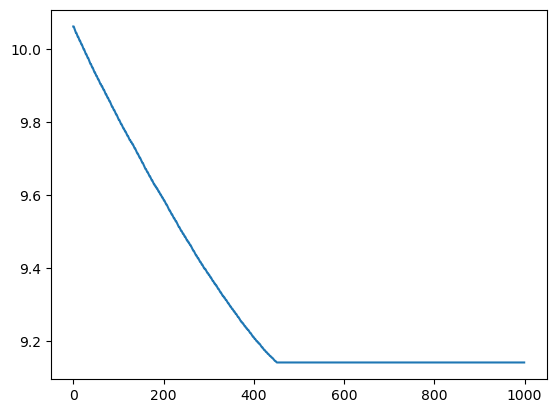

In [24]:
plt.plot()

In [3]:
population.batch

[]